In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn tensorflow pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os

# Load the dataset
df = pd.read_csv('D:\\SLIIT\\Y2S1\\AI & ML\\Project\\senal\\Healthcare-Diabetes.csv')

In [4]:
# Member 1-Implementation
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zero_as_missing] = df[columns_with_zero_as_missing].replace(0, np.nan)
for col in columns_with_zero_as_missing:
    df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\weera\AppData\Local\Temp\ipykernel_19672\2997041809.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


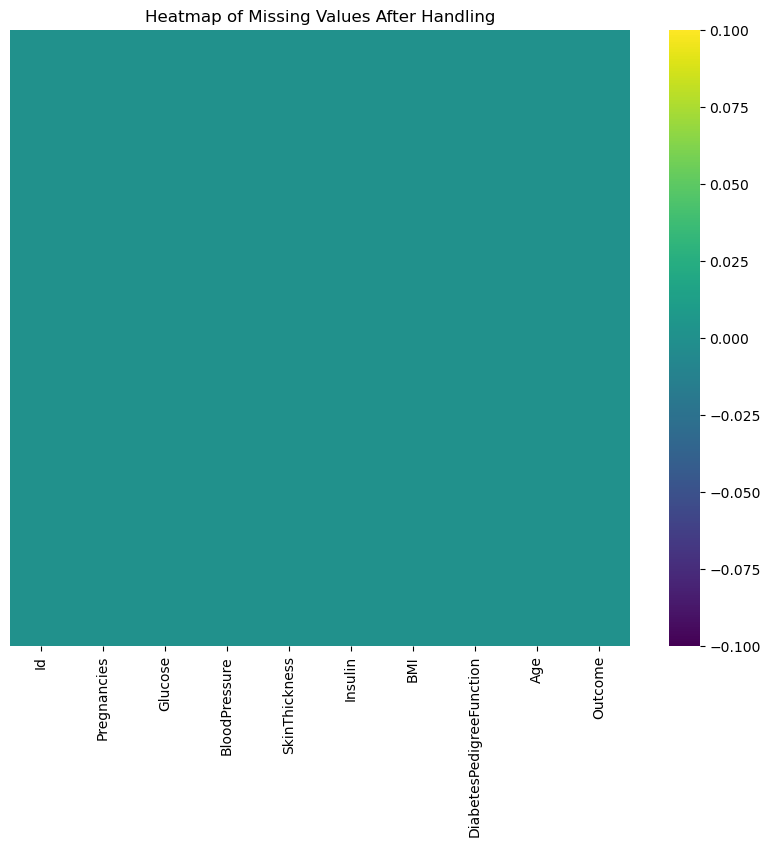

In [5]:
# EDA Visualization (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values After Handling')
plt.show()

In [6]:
# Member 2-Implementation
print("Duplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())
print("Shape after removal:", df.shape)

Duplicates before removal: 0
Duplicates after removal: 0
Shape after removal: (2768, 10)


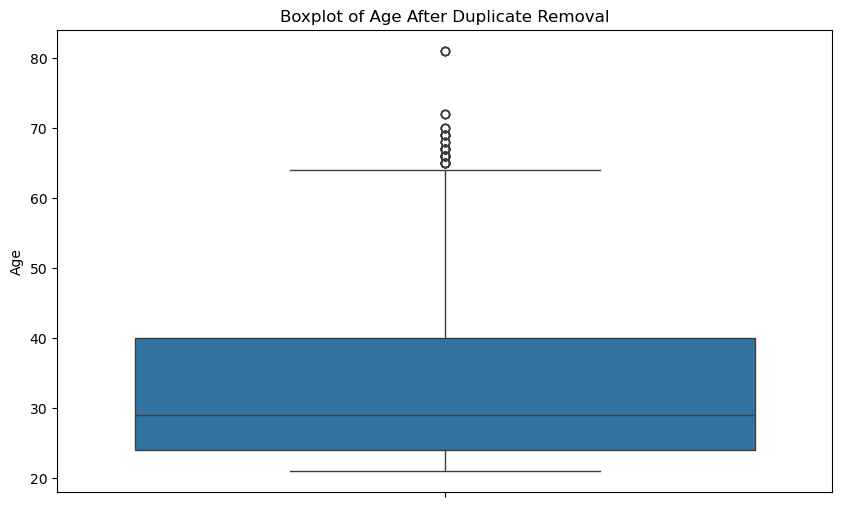

In [7]:
# EDA Visualization (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age After Duplicate Removal')
plt.ylabel('Age')
plt.show()

In [8]:
# Member 3-Implementation (Code and Output)
# Select numerical columns for outlier detection
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers per column
outliers_count = {}
for col in numerical_cols:
    outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()
    outliers_count[col] = outliers

# Remove outliers
outlier_condition = ~((df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)).all(axis=1)
df_cleaned = df[~outlier_condition].copy()

# Display shape before and after outlier removal
print("\nShape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)
print("\nFirst 5 rows after outlier removal:")
print(df_cleaned.head())


Shape before outlier removal: (2768, 10)
Shape after outlier removal: (1829, 10)

First 5 rows after outlier removal:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0   1            6    148.0           72.0      35.000000  154.23783  33.6   
1   2            1     85.0           66.0      29.000000  154.23783  26.6   
2   3            8    183.0           64.0      29.289634  154.23783  23.3   
3   4            1     89.0           66.0      23.000000   94.00000  28.1   
5   6            5    116.0           74.0      29.289634  154.23783  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


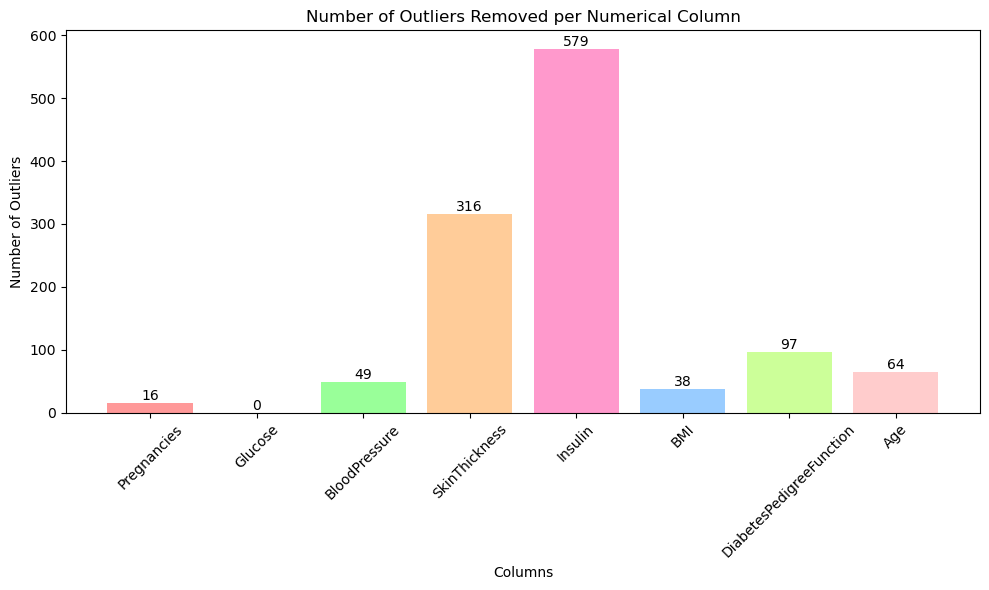

In [9]:
# Step 3: EDA Visualization (Bar Chart)
# Create a bar chart of outliers removed per column
plt.figure(figsize=(10, 6))
bars = plt.bar(outliers_count.keys(), outliers_count.values(), color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#CCFF99', '#FFCCCC'])
plt.title('Number of Outliers Removed per Numerical Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             int(height),
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [10]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Member 4-Implementation
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Shape after scaling:", df.shape)
print("\nFirst 5 rows after normalization/scaling:")
print(df.head())

Shape after scaling: (2768, 10)

First 5 rows after normalization/scaling:
   Id  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0   1     0.352941  0.670968       0.489796       0.271845  0.168555   
1   2     0.058824  0.264516       0.428571       0.213592  0.168555   
2   3     0.470588  0.896774       0.408163       0.216404  0.168555   
3   4     0.058824  0.290323       0.428571       0.155340  0.096154   
4   5     0.000000  0.600000       0.163265       0.271845  0.185096   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.246795                  0.234415  0.483333        1  
1  0.134615                  0.116567  0.166667        0  
2  0.081731                  0.253629  0.183333        1  
3  0.158654                  0.038002  0.000000        0  
4  0.399038                  0.943638  0.200000        1  


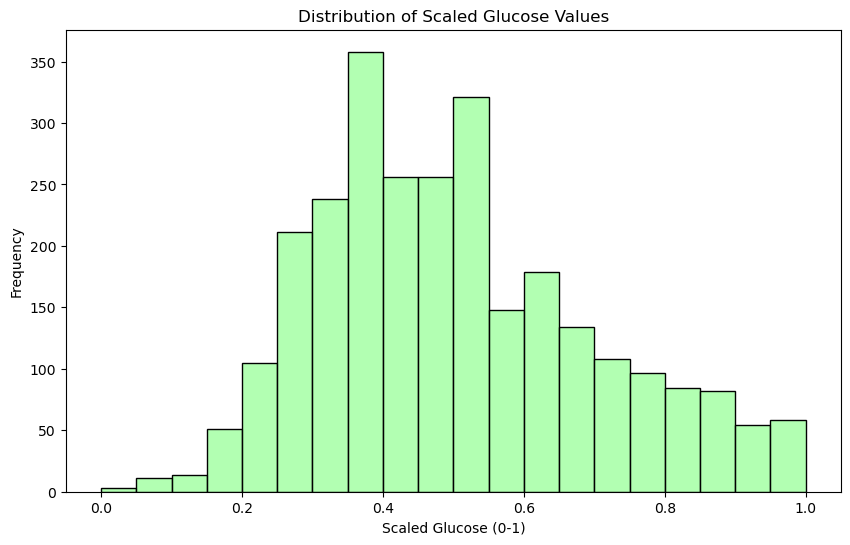

In [11]:
# EDA Visualization (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', bins=20, color='#99FF99')
plt.title('Distribution of Scaled Glucose Values')
plt.xlabel('Scaled Glucose (0-1)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Member 5-Implementation
corr_matrix = df.corr()
corr_with_target = corr_matrix['Outcome'].abs().sort_values(ascending=False)
selected_features = corr_with_target[1:6].index.tolist()
df = df[selected_features + ['Outcome']]

print("Selected Features:", selected_features)
print("Shape after feature selection:", df.shape)
print("\nFirst 5 rows after feature selection:")
print(df.head())

Selected Features: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']
Shape after feature selection: (2768, 6)

First 5 rows after feature selection:
    Glucose       BMI       Age  Pregnancies   Insulin  Outcome
0  0.670968  0.246795  0.483333     0.352941  0.168555        1
1  0.264516  0.134615  0.166667     0.058824  0.168555        0
2  0.896774  0.081731  0.183333     0.470588  0.168555        1
3  0.290323  0.158654  0.000000     0.058824  0.096154        0
4  0.600000  0.399038  0.200000     0.000000  0.185096        1


C:\Users\weera\AppData\Local\Temp\ipykernel_19672\3598756272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='viridis')


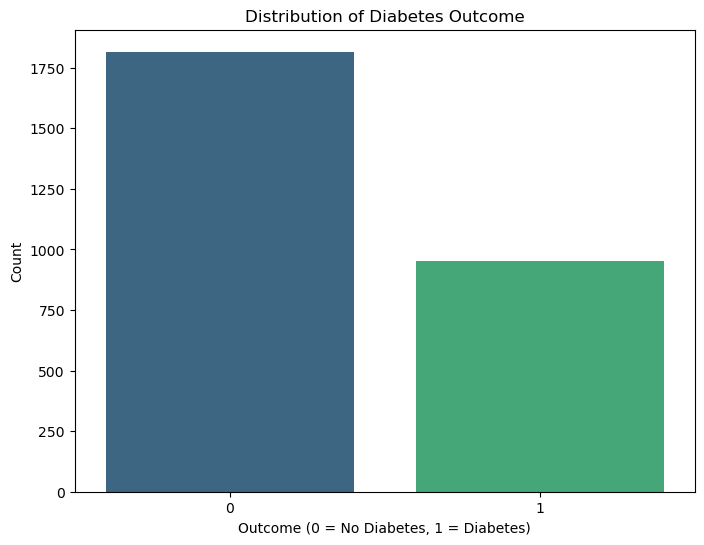

In [13]:
# EDA Visualization (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome', palette='viridis')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

In [18]:

import seaborn as sns
from sklearn.decomposition import PCA

# Member 6-Implementation
numerical_cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI','Age']
pca = PCA(n_components=3)
X = df[numerical_cols]
pca_features = pca.fit_transform(X)
df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])
df_pca['Outcome'] = df['Outcome'].values

print("Explained Variance Ratio by Each Component:", pca.explained_variance_ratio_)
print("\nFirst 5 rows after PCA:")
print(df_pca.head())

Explained Variance Ratio by Each Component: [0.46551537 0.270526   0.12377955]

First 5 rows after PCA:
        PC1       PC2       PC3  Outcome
0  0.338879  0.035188  0.089022        1
1 -0.226748 -0.142521  0.126459        0
2  0.296506  0.199700 -0.204204        1
3 -0.332441 -0.101327  0.006081        0
4 -0.083989  0.210410  0.105288        1


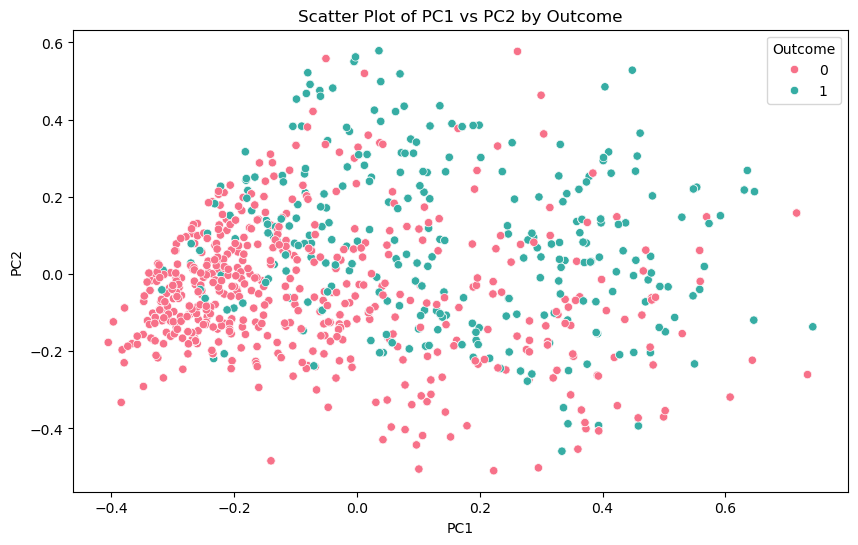

In [19]:
# EDA Visualization (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Outcome', palette='husl')
plt.title('Scatter Plot of PC1 vs PC2 by Outcome')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

C:\Users\weera\AppData\Local\Temp\ipykernel_6032\2729307529.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Binned', palette='Blues')


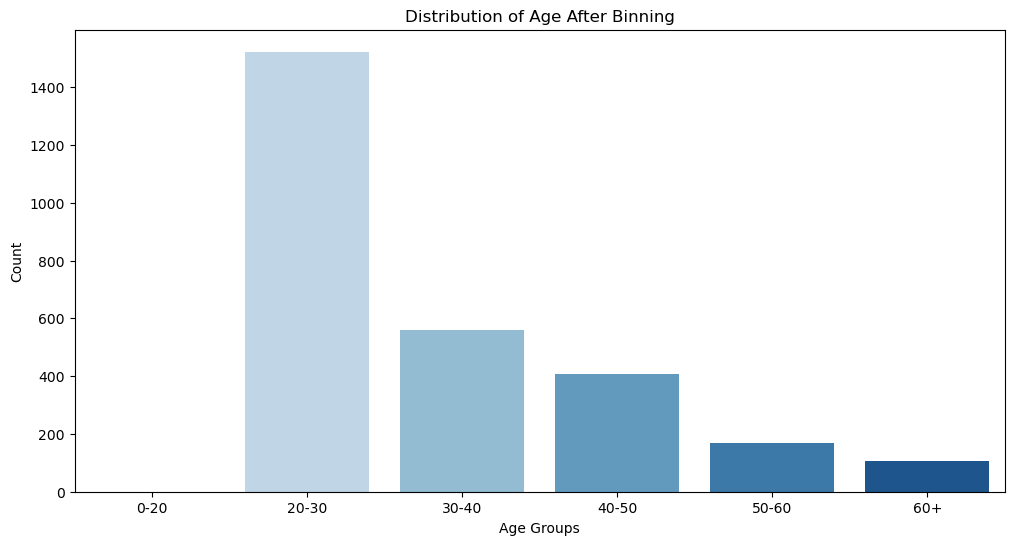

Shape after discretization: (2768, 4)

First 5 rows after discretization:
   Id  Outcome Age_Binned Glucose_Binned
0   1        1      40-50       Diabetic
1   2        0      30-40         Normal
2   3        1      30-40       Diabetic
3   4        0      20-30         Normal
4   5        1      30-40       Diabetic


In [2]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Feature Discretization (Binning)
df['Age_Binned'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])
df['Glucose_Binned'] = pd.cut(df['Glucose'], bins=[0, 100, 125, 200], labels=['Normal', 'Prediabetic', 'Diabetic'])

# Drop original continuous columns if desired (optional)
df_discretized = df.drop(numerical_cols, axis=1)
# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_Binned', palette='Blues')
plt.title('Distribution of Age After Binning')
plt.xlabel('Age Groups')
plt.ylabel('Count')
os.makedirs('results/eda_visualizations', exist_ok=True)
plt.savefig('results/eda_visualizations/age_binning_distribution.png')
plt.show()

print("Shape after discretization:", df_discretized.shape)
print("\nFirst 5 rows after discretization:")
print(df_discretized.head())

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os  # Added to create directories

# Load the dataset
df = pd.read_csv('D:\\SLIIT\\Y2S1\\AI & ML\\Project\\senal\\Healthcare-Diabetes.csv')

# Display initial shape and first 5 rows
print("Initial Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Function for the full preprocessing pipeline (retaining all numerical columns)
def full_preprocessing_pipeline(df):
    # Member 1:Handling Missing Data
    numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df[columns_with_zero_as_missing] = df[columns_with_zero_as_missing].replace(0, np.nan)
    for col in columns_with_zero_as_missing:
        df[col].fillna(df[col].mean(), inplace=True)
    print("\nMissing values after handling (Member 1):")
    print(df.isnull().sum())
    
    # Member 2: Handling Duplicates
    print("Duplicates before removal (Member 2):", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Duplicates after removal:", df.duplicated().sum())
    print("Shape after duplicate removal:", df.shape)
    
    # Member 3: Outlier Removal
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("\nShape after outlier removal (Member 3):", df.shape)
    
    # Member 4:Normalization/Scaling
    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("\nShape after scaling (Member 4):", df.shape)
    print("\nFirst 5 rows after normalization/scaling:")
    print(df.head())
    
    # Member 5: Feature Engineering (Feature Importance Analysis)
    # Use only numerical columns for feature importance
    X = df[numerical_cols]  # Explicitly select numerical columns
    y = df['Outcome']
    mutual_info = mutual_info_classif(X, y)
    feature_importance = pd.Series(mutual_info, index=numerical_cols).sort_values(ascending=False)
    print("\nFeature Importance (Member 5):", feature_importance)
    
    # Member 6:  Feature Engineering (Variance Analysis)
    # Simulate "explained variance" via feature correlations
    corr_matrix = df[numerical_cols].corr()
    explained_variance = corr_matrix.abs().mean().values  # Average absolute correlation as proxy
    print("\nAverage Explained Variance per Feature (Member 6):", dict(zip(numerical_cols, explained_variance)))

# Member 7: Feature Discretization (Binning) - Adding Age Binning column to loaded data
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_loaded['Age_Binned'] = pd.cut(df_loaded['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60+'])
df_discretized = df_loaded  # Keep all columns including the new Age_Binned

# Display discretization results
print("\nShape after adding Age_Binned (Member 7):", df_discretized.shape)
print("\nValue counts for Age_Binned:")
print(df_discretized['Age_Binned'].value_counts())
print("\nFirst 5 rows after adding Age_Binned:")
print(df_discretized.head())

# Save the discretized dataframe with the new Age_Binned column
df_discretized.to_csv('D:\\SLIIT\\Y2S1\\AI & ML\\Project\\final_preprocessed.csv', index=False)
print("\nDataset with Age_Binned saved successfully as 'final_preprocessed.csv'!")


Initial Shape: (2768, 10)

First 5 rows of the dataset:
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape after adding Age_Binned (Member 7): (1829, 11)

Value counts for Age_Binned:
Age_Binned
0-20     1689
20-30       0
30-40       0
40-50       0
50-60       0
60+         0
Name: count, dtype: int64

First 5 rows afte